# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Make dataset

In [ ]:
X,y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)

In [ ]:
X.shape, y.shape

((1000, 10), (1000,))

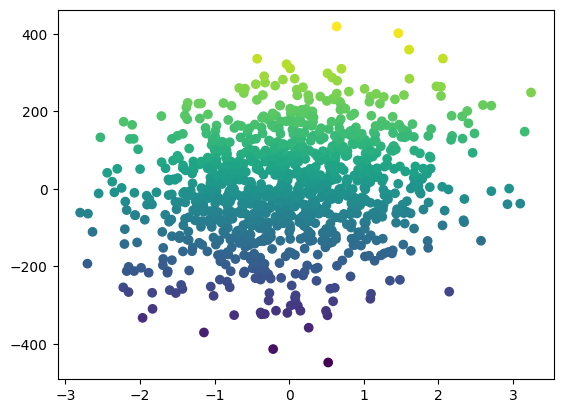

In [ ]:
plt.scatter(X[:,0], y, c=y)

# Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply LinearRegression

In [ ]:
reg1 = LinearRegression()
reg1.fit(X_train, y_train)
r2_score(y_test, reg1.predict(X_test))

0.9943256989167222

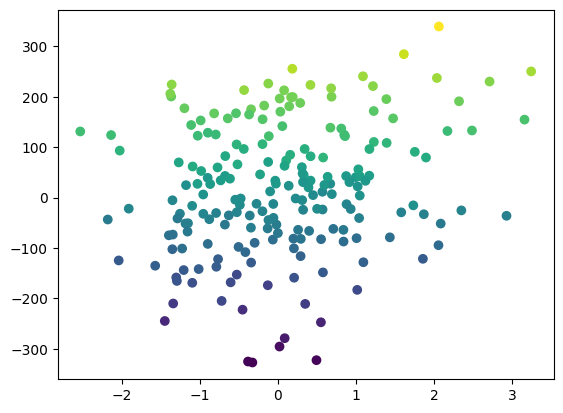

In [ ]:
plt.scatter(X_test[:,0], reg1.predict(X_test), c=y_test)

# Apply Ridge Regression

In [ ]:
reg2 = Ridge(alpha=0.1, solver='cholesky')
reg2.fit(X_train, y_train)
r2_score(y_test, reg2.predict(X_test))

0.9943266291745777

In [ ]:
reg2.intercept_, reg2.coef_

(-0.5247279788158496,
 array([33.73478115, 31.75696229, 29.1976364 , 74.45413932,  6.99764235,
         9.70385845, 76.36200303,  9.0884599 ,  4.762375  , 58.8438501 ]))

# Make Custom Ridge Regression
<span style="color:#03d7fc"> $\omega = (X^TX + \lambda I)⁻¹ X^TY$ </span>

In [ ]:
class CustomRidge:
  def __init__(self, alpha=0.1):
    self.alpha = alpha
    self.coef_ = None
    self.intercept_ = None

  def fit(self, X_train, y_train):
    X = np.insert(X_train, 0, 1, axis=1)
    I = np.eye(X.shape[1])
    I[0][0] = 0
    xtx = np.dot(X.T, X)
    lmdi = np.dot(self.alpha, I)
    xty = np.dot(X.T, y_train)
    inv = np.linalg.inv(xtx+lmdi)
    womega = np.dot(inv, xty)

    self.intercept_ = womega[0]
    self.coef_ = womega[1:]


  def predict(self, X_test):
    return self.intercept_ + np.dot(X_test, self.coef_)

In [ ]:
reg3 = CustomRidge(alpha=0.1)
reg3.fit(X_train, y_train)
r2_score(y_test, reg3.predict(X_test))

0.9943266291745777

In [ ]:
reg3.intercept_, reg3.coef_

(-0.5247279788158531,
 array([33.73478115, 31.75696229, 29.1976364 , 74.45413932,  6.99764235,
         9.70385845, 76.36200303,  9.0884599 ,  4.762375  , 58.8438501 ]))

In [ ]:
reg2.intercept_, reg2.coef_

(-0.5247279788158496,
 array([33.73478115, 31.75696229, 29.1976364 , 74.45413932,  6.99764235,
         9.70385845, 76.36200303,  9.0884599 ,  4.762375  , 58.8438501 ]))